# Drought / Shadow / Water Tolerances following Niinements et al. 2006


In [5]:
import sys

sys.path.insert(0, "../../src")
from imports import *

init_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Subset of species for which the final model runs worked
all_species = [
    "Abies alba",
    "Acer campestre",
    "Acer pseudoplatanus",
    "Alnus glutinosa",
    "Alnus incana",
    "Arbutus unedo",
    "Betula pendula",
    "Betula pubescens",
    "Buxus sempervirens",
    "Carpinus betulus",
    "Castanea sativa",
    "Corylus avellana",
    "Crataegus monogyna",
    "Fagus sylvatica",
    "Frangula alnus",
    "Fraxinus excelsior",
    "Juniperus communis",
    "Laburnum anagyroides",
    "Larix decidua",
    "Malus sylvestris",
    "Picea abies",
    "Picea sitchensis",
    "Pinus halepensis",
    "Pinus mugo",
    "Pinus nigra",
    "Pinus pinaster",
    "Pinus sylvestris",
    "Populus",
    "Populus nigra",
    "Populus tremula",
    "Prunus avium",
    "Prunus spinosa",
    "Pseudotsuga menziesii",
    "Quercus ilex",
    "Quercus petraea",
    "Quercus pubescens",
    "Quercus pyrenaica",
    "Quercus robur",
    "Robinia pseudoacacia",
    "Salix alba",
    "Salix caprea",
    "Salix cinerea",
    "Sambucus nigra",
    "Sorbus aria",
    "Sorbus aucuparia",
    "Sorbus torminalis",
    "Tilia cordata",
    "Ulmus minor",
]

In [8]:
# Load nfi data
nfi = get_final_nfi_data_for_analysis()

# Reduced df
nfi_clean = (
    nfi[["species_lat2", "tree_class"]]
    .query("species_lat2 in @all_species")
    .drop_duplicates()
)


Loading final NFI data for analysis... (output of python wrangling)
- Latest file is /Users/pascal/repos/padasch/ifn_analysis/data/final/nfi/nfi_ready_for_analysis.feather 
- Created on Friday 2024-06-21, 12:06 which is 3 days ago.
  Number of trees:  617351
  Number of sites:  45018


## NFI Data


/var/folders/39/534x_msj7sl1kcxj2mg109x40000gn/T/ipykernel_1089/4091047929.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = tmp.groupby("species_lat2").agg({"htot": ["mean", "std"]}).reset_index()


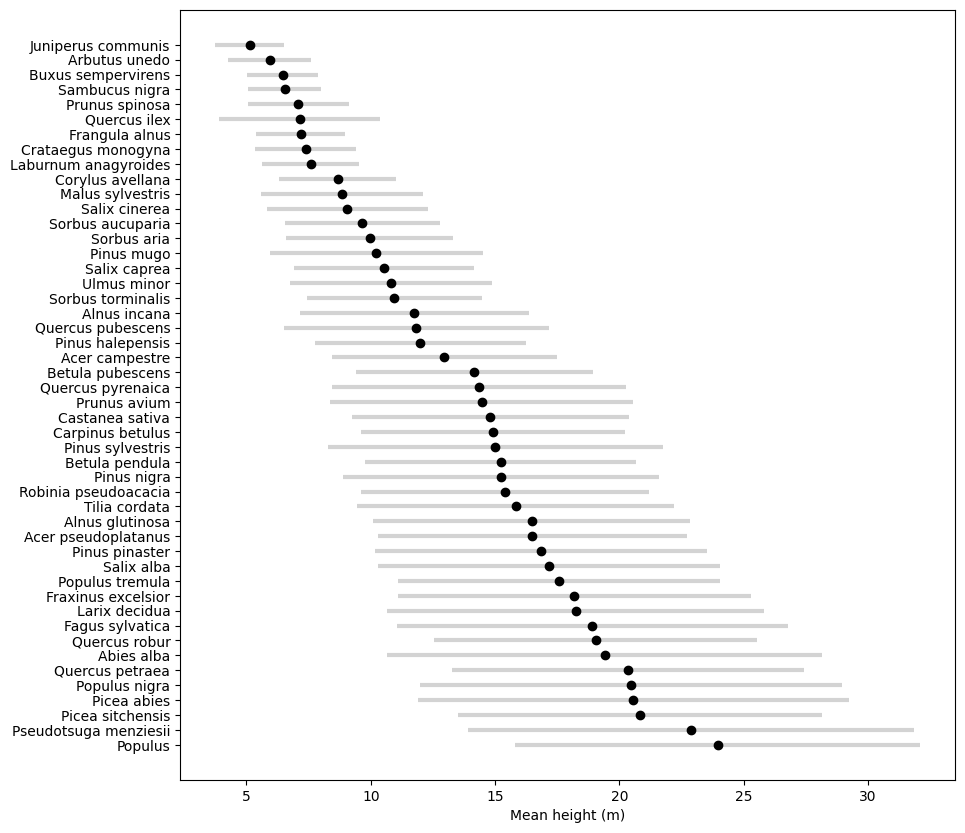

In [9]:
## Attach mean height per species

# First get count of trees
df_htot = get_final_nfi_data_for_analysis(verbose=False).query(
    "tree_state_change in ['alive_alive', 'alive_dead']"
)

# Get normalized and non normalized counts
species = df_htot["species_lat2"].value_counts()
species_norm = df_htot["species_lat2"].value_counts(normalize=True)

# Get subsets
tmp = nfi.copy()
xxx = pd.DataFrame(species).reset_index()

# Get mean and std of htot per species and attach it
tmp = tmp.groupby("species_lat2").agg({"htot": ["mean", "std"]}).reset_index()
tmp.columns = ["species_lat2", "htot_mean", "htot_std"]
xxx = pd.merge(xxx, tmp, how="left", on="species_lat2")

# Subset to relevant species
xxx = xxx.sort_values("count", ascending=False)
# xxx = xxx.head(20)
xxx = xxx.query("species_lat2 in @all_species")
xxx = xxx.sort_values("htot_mean", ascending=False)


# Attach data
nfi_clean = pd.merge(nfi_clean, xxx, how="left", on="species_lat2").drop(
    "htot_std", axis=1
)

# Plot height with error bars
plt.figure(figsize=(10, 10))
plt.errorbar(
    xxx["htot_mean"],
    xxx["species_lat2"],
    xerr=xxx["htot_std"],
    fmt="o",
    color="black",
    ecolor="lightgray",
    elinewidth=3,
    capsize=0,
)
plt.xlabel("Mean height (m)")
plt.show()

In [10]:
# Attach succesion class
data = {
    "species_lat2": [
        "Abies alba",
        "Acer campestre",
        "Acer pseudoplatanus",
        "Alnus glutinosa",
        "Alnus incana",
        "Arbutus unedo",
        "Betula pendula",
        "Betula pubescens",
        "Buxus sempervirens",
        "Carpinus betulus",
        "Castanea sativa",
        "Corylus avellana",
        "Crataegus monogyna",
        "Fagus sylvatica",
        "Frangula alnus",
        "Fraxinus excelsior",
        "Juniperus communis",
        "Laburnum anagyroides",
        "Larix decidua",
        "Malus sylvestris",
        "Picea abies",
        "Picea sitchensis",
        "Pinus halepensis",
        "Pinus mugo",
        "Pinus nigra",
        "Pinus pinaster",
        "Pinus sylvestris",
        "Populus",
        "Populus nigra",
        "Populus tremula",
        "Prunus avium",
        "Prunus spinosa",
        "Pseudotsuga menziesii",
        "Quercus ilex",
        "Quercus petraea",
        "Quercus pubescens",
        "Quercus pyrenaica",
        "Quercus robur",
        "Robinia pseudoacacia",
        "Salix alba",
        "Salix caprea",
        "Salix cinerea",
        "Sambucus nigra",
        "Sorbus aria",
        "Sorbus aucuparia",
        "Sorbus torminalis",
        "Tilia cordata",
        "Ulmus minor",
    ],
    "succession": [
        "Late",
        "Mid",
        "Mid",
        "Early",
        "Early",
        "Late",
        "Early",
        "Early",
        "Late",
        "Late",
        "Mid",
        "Early",
        "Mid",
        "Late",
        "Early",
        "Mid",
        "Early",
        "Mid",
        "Early",
        "Early",
        "Late",
        "Late",
        "Early",
        "Mid",
        "Early",
        "Early",
        "Early",
        "Early",
        "Early",
        "Early",
        "Mid",
        "Early",
        "Mid",
        "Late",
        "Late",
        "Late",
        "Late",
        "Late",
        "Early",
        "Early",
        "Early",
        "Early",
        "Early",
        "Early",
        "Early",
        "Mid",
        "Late",
        "Mid",
    ],
}

# Create the DataFrame
df = pd.DataFrame(data)

# Merge data
nfi_clean = pd.merge(nfi_clean, df, on="species_lat2", how="left")
nfi_clean

,species_lat2,tree_class,count,htot_mean,succession
0,Quercus petraea,broadleaf,45328,20.346377,Late
1,Salix caprea,broadleaf,5393,10.523728,Early
2,Corylus avellana,broadleaf,9105,8.673123,Early
3,Quercus ilex,broadleaf,16245,7.140528,Late
4,Carpinus betulus,broadleaf,43472,14.916647,Late
5,Betula pendula,broadleaf,12299,15.221446,Early
6,Fagus sylvatica,broadleaf,46807,18.911685,Late
7,Alnus glutinosa,broadleaf,6176,16.468127,Early
8,Buxus sempervirens,broadleaf,618,6.464055,Late
9,Castanea sativa,broadleaf,33148,14.807892,Mid


## Niinement Data


### Cleaning


In [11]:
# Load csv file for tolerances
tolerances = pd.read_csv("../../docs/niinements2006tolerance_SI-B_index-table.csv")
tolerances

,Species,Aggregate species,Data set 1,Data set 2,Evergreen,Gymnosperm,Shade tolerance,Drought tolerance,Waterlogging tolerance
0,Abelia × grandiflora (A. chinesis × A. uniflora),N,East Asia,East Asia,Y,N,3.5,2,1
1,Abies alba,N,Europe,Europe,Y,Y,4.6±0.06,1.81±0.28,1.02±0.02
2,Abies amabilis,N,North America,North America,Y,Y,4.21±0.37,0.83±0.17,1
3,Abies balsamea,N,North America,North America,Y,Y,5.01±0.09,1,2
4,Abies concolor,N,North America,North America,Y,Y,4.33±0.28,1.91±0.12,1.02±0.02
...,...,...,...,...,...,...,...,...,...
801,Yucca brevifolia,N,North America,North America,Y,N,1.17±0.17,4.95,1.53
802,Zanthoxylum ailanthoides,N,East Asia,East Asia,N,N,2,4,1
803,Zanthoxylum clava herculis,N,North America,North America,N,N,2.5,4±0,1
804,Zelkova serrata,N,East Asia,East Asia,N,N,2.09±0.09,3.35±0.35,1.02±0.02


In [12]:
# Clean dataset
tol = tolerances.copy()

# Remove trailing white spaces from variable names and from cells
tol.columns = tol.columns.str.strip()
tol = tol.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# tol.columns = tol.columns.str.replace(" ", "")

# Remove values after ± in tolerance columns
for col in tol.columns:
    if "tolerance" in col:
        tol[col] = tol[col].str.split("±").str[0]

# Reduce species name to first two words
# tol["Species"] = tol["Species"].str.split(" ").str[:2].str.join(" ").str.strip()

# If there are species with the same name, take european species
# for species in tol.Species.tolist():


tol.Species.value_counts()

/var/folders/39/534x_msj7sl1kcxj2mg109x40000gn/T/ipykernel_1089/1891763098.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tol = tol.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Species
Abelia × grandiflora (A. chinesis × A. uniflora)    1
Quercus incana                                      1
Quercus douglasii                                   1
Quercus dumosa                                      1
Quercus emoryi                                      1
                                                   ..
Ginkgo biloba                                       1
Gleditsia aquatica                                  1
Gleditsia triacanthos                               1
Gordonia lasianthus                                 1
Zizyphus jujuba                                     1
Name: count, Length: 806, dtype: int64

### Filtering


In [13]:
# Check if all nfi species are in tolerance table
print("\nMissing species before renaming:")
for species in all_species:
    if species not in tol.Species.tolist():
        print(f"- {species} is missing")

# Rename species, if data is actually available
tol = tol.replace({"Species": {"Crataegus monogyna agg.": "Crataegus monogyna"}})

# Repeat check
print("\nMissing species after renaming:")
for species in all_species:
    if species not in tol.Species.tolist():
        print(f"- {species} is missing")


Missing species before renaming:
- Crataegus monogyna is missing
- Pinus pinaster is missing
- Populus is missing
- Quercus pyrenaica is missing

Missing species after renaming:
- Pinus pinaster is missing
- Populus is missing
- Quercus pyrenaica is missing


### Attaching


In [14]:
# Get final df
tol_clean = tol[
    [
        "Species",
        # "Aggregate species",
        # "Data set 1",
        # "Data set 2",
        # "Evergreen",
        # "Gymnosperm",
        "Shade tolerance",
        "Drought tolerance",
        "Waterlogging tolerance",
    ]
]

tol_clean = tol_clean.rename(
    {
        "Species": "species_lat2",
        "Shade tolerance": "nii_shade",
        "Drought tolerance": "nii_drought",
        "Waterlogging tolerance": "nii_waterlog",
    },
    axis=1,
)
tol_clean

,species_lat2,nii_shade,nii_drought,nii_waterlog
0,Abelia × grandiflora (A. chinesis × A. uniflora),3.5,2,1
1,Abies alba,4.6,1.81,1.02
2,Abies amabilis,4.21,0.83,1
3,Abies balsamea,5.01,1,2
4,Abies concolor,4.33,1.91,1.02
...,...,...,...,...
801,Yucca brevifolia,1.17,4.95,1.53
802,Zanthoxylum ailanthoides,2,4,1
803,Zanthoxylum clava herculis,2.5,4,1
804,Zelkova serrata,2.09,3.35,1.02


In [15]:
# Merge
df_merged = pd.merge(nfi_clean, tol_clean, on="species_lat2", how="left")

# Check if number of species remained the same
if len(df_merged) != len(all_species):
    chime.error()
    raise ValueError("Number of species in all_species and df_merged are different!")

df_niinements_final = df_merged.copy()
df_niinements_final

,species_lat2,tree_class,count,htot_mean,succession,nii_shade,nii_drought,nii_waterlog
0,Quercus petraea,broadleaf,45328,20.346377,Late,2.73,3.02,1.2
1,Salix caprea,broadleaf,5393,10.523728,Early,2.16,2.24,2.84
2,Corylus avellana,broadleaf,9105,8.673123,Early,3.53,3.04,1.68
3,Quercus ilex,broadleaf,16245,7.140528,Late,3.02,4.72,1.04
4,Carpinus betulus,broadleaf,43472,14.916647,Late,3.97,2.66,1.65
5,Betula pendula,broadleaf,12299,15.221446,Early,2.03,1.85,1.67
6,Fagus sylvatica,broadleaf,46807,18.911685,Late,4.56,2.4,1.02
7,Alnus glutinosa,broadleaf,6176,16.468127,Early,2.71,2.22,3.9
8,Buxus sempervirens,broadleaf,618,6.464055,Late,4.05,3.88,1.04
9,Castanea sativa,broadleaf,33148,14.807892,Mid,3.15,3.46,1.32


## Final data


In [ ]:
# Merge all together
df_merged = nfi_clean.copy()
df_merged = pd.merge(df_merged, tol_clean, on="species_lat2", how="left")

# Fix dtypes
df_merged["tree_class"] = df_merged["tree_class"].astype(str)
df_merged["nii_shade"] = df_merged["nii_shade"].astype(float)
df_merged["nii_drought"] = df_merged["nii_drought"].astype(float)
df_merged["nii_waterlog"] = df_merged["nii_waterlog"].astype(float)
df_merged.sort_values("species_lat2")

# Save to csv
df_merged.to_csv(
    "../../data/final/tables/species_tolerance_and_habita_data.csv", index=False
)

In [4]:
raise Exception("End of Script")

Exception: End of Script